<p></p>

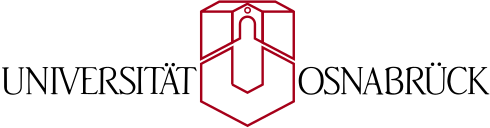
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 6: Prädikatenlogik

## Modellierung und Resolution in Prädikatenlogik

Gegeben seien folgende Sätze:

- Jeder, der Hufe und vier Beine hat, ist ein Huftier. 
- Jedes Huftier ist entweder Elch oder Rentier. 
- Rentiere haben rote Nasen. 
- Elche trinken gerne Bier. 
- Hugo hat vier Beine und Hufe. 
- Hugo hat keine rote Nase. 
- Elche singen, wenn sie genügend Bier getrunken haben.

### 

Transformieren Sie die Aussagen in Prädikatenlogik ("rote Nase ist als einzelnes Fakt zu verstehen). Überführen Sie die Ausdrücke in Klauselform. Beweisen Sie mit Resolution aus der Klauselmenge, dass Hugo gerne Bier trinkt. Geben Sie jeweils den Unifikator an, falls Sie unifizieren müssen.

## Prädikatenlogik und Folgerung

Gegeben sind die beiden folgenden Sätze in Prädikatenlogik:

\begin{align}
  \forall x. \exists y. \geq \left( x, y \right) \label{eq:a}\\
  \exists y. \forall x. \geq \left( x, y \right) \label{eq:b}
\end{align}

### 

Nehmen Sie nun an, dass die Variablen mit Werten aus $\unicode{x02115}$ (einschließlich $0$) belegt werden können und das Prädikat "$\geq$" mit dem mathematischen Operator "größer gleich" übereinstimmt. 
übersetzen Sie unter dieser Interpretation die beiden Sätze ins Deutsche.

YOUR ANSWER HERE

### 

Sind die Sätze unter dieser Interpretation des Prädikats wahr?

YOUR ANSWER HERE

### 

Gilt (1) $\models$ (2)
bzw. (2) $\models$ (1) ?


YOUR ANSWER HERE

### 

Benutzen Sie Resolution um zu zeigen, dass (2) aus (1) folgt. Versuchen Sie dies, auch wenn Sie der Meinung sind, dass aus (1) nicht (2) folgt. Setzen Sie den Resolutionsbeweis fort, bis er entweder gelingt oder fehlschlägt und nicht weiter fortgesetzt werden kann. Geben Sie dabei an wie Sie unifizieren und begründen Sie warum der Beweis fehlschlägt (wenn er denn fehlschlagen sollte).

YOUR ANSWER HERE

### 

Versuchen Sie nun zu zeigen, dass (1) aus (2) folgt.

YOUR ANSWER HERE

## Listen in Prolog

Eine Liste ist in Prolog eine geordnete Folge von Elementen beliebiger Länge. Listen werden in eckigen Klammern geschrieben und die Elemente durch Kommata getrennt. 

Beispiele: 
- `[1, 2, 3, 4, 5, 6]` 
- `[mutter, vater, tochter, sohn]` 
- `[[1, 1], [2, 4], [3, 9], [4, 16]]`

Das dritte Beispiel zeigt, dass Listen auch geschachtelt werden können, um etwa eine Wertetabelle darzustellen. 

Formal ist eine Prolog-Liste eine rekursive Datenstruktur. Sie besteht entweder aus der leeren Liste `[]` oder einem Kopfelement `K` und einer Restliste `R`: `[K|R]`. 
Mit Hilfe des Listenoperators `|` kann man eine bestehende Liste in Kopfelement und Restliste aufteilen oder aus einem Kopfelement und einer Liste eine neue Liste erzeugen, also `[Element|Restliste]`. 

Beispiele:

- `[1|[2, 3]]` ist die Liste mit dem Kopfelement `1` und der Restliste `[2, 3]`. Sie entspricht der Liste `[1, 2, 3]`. 
- `?- Y = [b, c, d], X = [a|Y]` erstellt mit Hilfe der 3-elementigen Liste Y die 4-elementige Liste `[a, b, c, d]` - `?- [X|Y] = [a, b, c, d]` zerlegt die Liste `[a, b, c, d]` in den Kopf `X = a` und die Restliste `Y = [b, c, d]`. 

Anmerkungen: 

1. Der Zugriff auf eine Liste ist nur über das erste Element, also den Listenkopf, möglich. Soll auf andere Elemente zugegriffen werden, so müssen entsprechende Prädikate definiert werden. 
2. Listen können beliebige, gemischte Datenobjekte enthalten, z.B., `[name(’Max’, ’Meier’), hat, 2, ’Soehne’, und, 2, ’Tochter’]`.

Schreiben Sie eigene Prolog Klauseln für die folgenden Aufgaben.

*Hinweis*: Das benutzen fertiger Listenoperationen, z.B. von
`delete/3` zur Implementierung von `my_delete/3` gilt hier
nicht als Bearbeitung der Aufgabenstellung.

*Hinweis*: Nutzen Sie zur Lösung wieder die `IsolatedProlog`- Klasse. Die Fehlerbehebungen aus dem Forum zur Nutzung unter Windows sind hier bereits eingepflegt.

1. `my_member(X, L)` ist wahr, falls die Liste `L` das Element `X` enthält.
2. `my_delete(X, L, R)` ist wahr, falls `R` die Liste ist, die aus Liste `L` durch das Löschen aller Vorkommen von `X` entsteht. Die Reihenfolge der restlichen Listenelemente bleibt unverändert.
3. `my_delete_list(X, L, R)` ist wahr, falls `R` die Liste ist, welche aus der Liste `L` durch das Löschen aller Vorkommen der Elemente von Liste `X` entsteht. Die Reihenfolge der restlichen Listenelemente soll unverändert bleiben.
4. `my_reverse(L, R)` ist wahr, falls `R` genau die Elemente der Liste `L` in umgekehrter Reihenfolge enthält.
5. `my_length(L, N)` ist wahr, falls `N` die Länge der Liste `L` ist.
6. `my_append(L1, L2, R)` ist wahr, wenn `R` die Liste ist, die durch die Konkatenation von Liste `L1` mit Liste `L2` entsteht. Die resultierende Liste `R` soll dabei mit `L1` beginnen.

Nutzen Sie die bereitgestellten Testcases, um Ihre Implementation zu verifizieren.


In [36]:
from isolated_prolog import IsolatedProlog
prolog = IsolatedProlog()

prolog_code = """

my_member(X,[X|T]).
my_member(X,[H|T]) :- my_member(X,T).

my_delete(X, X,[]).
my_delete(X, L, R) :- 

"""

prolog.consult(prolog_code, file=False)

In [37]:
# some test cases
assert list(prolog.query("my_member(baz, [foo, bar, baz])")), "my_member not implemented correctly"
assert not list(prolog.query("my_member(badz, [foo, bar, baz])")), "my_member not implemented correctly"


assert next(prolog.query("my_delete(baz, [foo, bar, baz], X)"))['X'] ==  ["foo", "bar"], "my_delete not implemented correctly"

assert next(prolog.query("my_delete_list([foo, bar], [foo, bar, baz], X)"))['X'] == ["baz"], "my_delete_list not implemented correctly"
assert next(prolog.query("my_delete_list([foo, 1, 2], [foo, bar, baz], X)"))['X'] == ["bar", "baz"], "my_delete_list not implemented correctly"

assert next(prolog.query("my_reverse([foo, bar, baz], X)"))['X'] == ["baz", "bar", "foo"], "my_reverse not implemented correctly"

assert next(prolog.query("my_length([foo, bar, baz, foobar, bam], X)"))['X'] == 5, "my_length not implemented correctly"

assert next(prolog.query("my_append([1,2,3,4], [5,6,7,8], X)"))['X'] == [1,2,3,4,5,6,7,8]

PrologError: Caused by: 'm7d864e4df62a4dcaa7303a3df53a2cb3:my_delete(baz, [foo, bar, baz], X)'. Returned: 'error(existence_error(procedure, :(m7d864e4df62a4dcaa7303a3df53a2cb3, /(my_delete, 3))), context(/(pyrun, 2), Variable(78)))'.

## Listen und Färben mit Prolog

Implementieren Sie nun, mit Ihrem bisher erworbenen Wissen, ein Prolog-Prädikat zur Lösung des bereits bekannten Färbeproblems aus dem CSP-Kapitel. Benachbarte Gebiete dürfen weiterhin nicht die gleiche Farbe bekommen. Ein Gebiet ist mit einem anderen benachbar, wenn die beiden Gebiete eine gemeinsame Grenze besitzen, welche nicht nur aus einem Punkt besteht. Testen Sie Ihr Verfahren mit Hilfe des folgenden Kartenausschnitts.
<div>
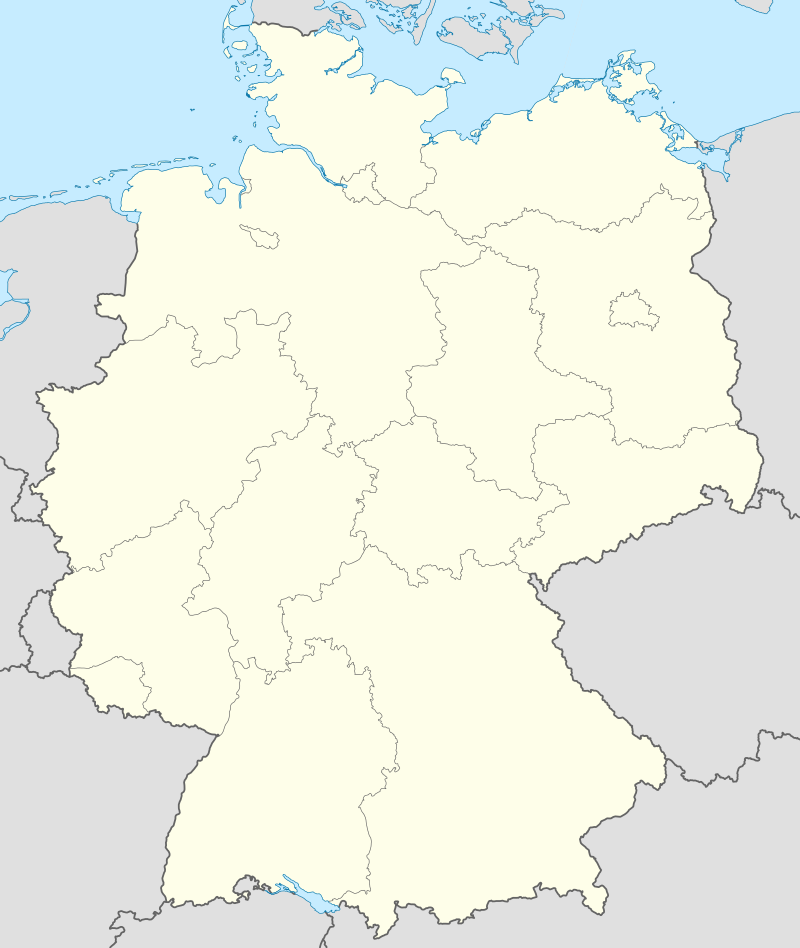 
</div>

### 

Starten Sie damit, dass Sie in Ihrer Wissensbasis mit dem Prädikat `neighbor/2` die Bundesländer auflisten, die jeweils benachbart sind. 

### 

Zur Ermittlung der Farbbelegung definieren Sie ein Prädikat `colorMap(StateList, ColorList, Result)`. Hierbei sei 
    - StateList eine Liste, in der alle einzufärbenden Bundesländer aufgeführt sind. 
    - ColorList eine Liste, in der alle verfügbaren Farben aufgelistet sind. 
    - Result eine Liste, in der, in geeigneter Weise, festgehalten wird, welches Gebiet in welcher Farbe gefärbt werden soll. 
    
### 

Nehmen Sie zunächst an, dass Ihnen zum Einfärben die Farben schwarz, rot und gold zur Verfügung stehen. Findet Prolog eine korrekte Lösung? 

### 

Nehmen Sie nun noch eine beliebige weitere Farbe hinzu. Gelingt Prolog diesmal das Einfärben der Karte? 

In [ ]:
from isolated_prolog import IsolatedProlog
prolog = IsolatedProlog()

#TODO: INSERT YOUR CODE HERE



### 

Welche weiteren Möglichkeiten gibt es in Prolog, neben Listen, die Farbbelegung festzuhalten? Führen Sie mindestens eine weitere Möglichkeit auf und erläutern Sie Vor- und Nachteile im Vergleich mit der Benutzung von Listen.

YOUR ANSWER HERE